#Lab Physics Lab 1 Notebook 

##Author: Kyle Sprague 
##Contact info: ksprague2020@gmail.com or ksprague@bates.edu 
##Data Collection Dates: 1/24/2023 and 1/26/2023 

The goal of this program is to calculate the speed of light using multiple band passes for an experimental set up described in the lab 1 section of the  following document:  

https://docs.google.com/document/d/1GrkSVIDzytpfVwfvNOm5d1UtYjRFYUbk0G1npeARx3E/edit# 

Data: 

https://docs.google.com/spreadsheets/d/11aQh1GQi-ZUUpYkxePlFjPWAymv187TZ/edit#gid=1323237025

https://docs.google.com/spreadsheets/d/11fI_c937hRH88UBrsaaJfUZh539bG_L5/edit#gid=833462683 





In [ ]:
!pip install lmfit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#importing relevant libraries 

import pandas as pd  
import numpy as np   
import scipy 
import lmfit as lm 
import matplotlib.pyplot as plt 
import math 
import matplotlib.ticker as mtick
#mounting drive 

from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


##LOADING AND ORGANIZING BANDPASS DATA

In [ ]:
#loading data for bandpass 1 

bandpass1 = pd.read_excel("/content/drive/MyDrive/Sprague | 231/L_1/Clean_Lab_C_Bandpass_1_Data.xlsx") 
bandpass1

,Single Pass,d_200,d_1000,w_1000_Hz_Counter_Value,w_200_Hz_Counter_Value
0,Trial 1,0.065,1.35,1003.6409,264.14444
1,Trial 2,0.020,1.48,1000.8366,270.56765
2,Trial 3,8.700,1.43,1000.8434,263.40144
3,Trial 4,9.550,1.46,1001.2450,263.12965
4,Trial 5,6.550,1.61,1000.4448,261.40963
5,Trial 6,8.300,1.61,1000.3512,271.02769


In [ ]:
#loading data for bandpass 2 

bandpass2 = pd.read_excel("/content/drive/MyDrive/Sprague | 231/L_1/Clean_Lab_C_Bandpass_2_data.xlsx") 
bandpass2

,Double Pass,d_200,d_1000,w_1000_Hz_Counter_Value,w_200_Hz_Counter_Value
0,Trial 1,0.0050,3.2100,1006.0923,204.12034
1,Trial 2,0.0850,3.2350,1011.7065,218.83031
2,Trial 3,0.1325,3.1925,1000.8434,222.77008
3,Trial 4,0.1750,3.1835,1008.4666,227.00608
4,Trial 5,0.9750,3.3600,1005.7272,230.12486


In [ ]:
#ORGANIZING BANDPASS DATA

columns = ["d_200", "d_1000 ", "w_1000_Hz_Counter_Value", "w_200_Hz_Counter_Value"]

def data_frame_columns_to_arrays(dataframe, column_names): 
  df_shape = dataframe.shape 
  composite_set = np.zeros((df_shape[1], df_shape[0]))
  for i in range(0, len(column_names)):
    composite_set[i] = dataframe[column_names[i]].to_numpy()  
  return composite_set

bandpass_1_array = data_frame_columns_to_arrays(bandpass1, columns) #now we have a single array that contains all of our data with 4 sub arrays of six elements 

#creating arrays that contain our data using the composite array above

B1_d_200_arr = bandpass_1_array[0]   
B1_d_1000_arr = bandpass_1_array[1]
B1_counter_value_thousand_arr = bandpass_1_array[2]  
B1_counter_value_two_hundred_arr = bandpass_1_array[3]

bandpass_2_array = data_frame_columns_to_arrays(bandpass2, columns) #this is a composite array of the same form as the above 

#createing arrays that contain our data using the composite array above

B2_d_200_arr = bandpass_2_array[0]   
B2_d_1000_arr = np.round(bandpass_2_array[1],2) 
B2_counter_value_thousand_arr = bandpass_2_array[2]    
B2_counter_value_two_hundred_arr = bandpass_2_array[3]

print(B2_d_200_arr)


#bandpass_2_array = data_frame_columns_to_arrays(bandpass2, columns)


[0.005  0.085  0.1325 0.175  0.975 ]


#Caclulating focal length *f*

\begin{equation} 
f = \frac{Ms_o}{M + 1}
\end{equation} 

M = magnification (variable name: M) \
\begin{equation} 
M = \frac{h_i}{h_0}  
\end{equation} 


where $h_i$ is the height of the image (variable name: h_i_values) and $h_o$ is the height of the object (variable name: h_0). In this case the image height refers to the measure on the dial of the telescope whereas $h_0$ is the actual distance on the tape, 3in = 0.0762m. \ 

Uncertainty in M is given by using partial derivatives. 

The distance to the wall from the telescope is given by $s_o$ (variable name: s_0). 

For the ruler stick we had two separate measurements that we have to add together. To get our total uncertainty, we then use: 

\begin{equation} 
\sigma_{total} = \sqrt{\sigma_a^2 + \sigma_b^2}.
\end{equation} 

The variable name for uncertainty in s_o is s_0_uncertainty. 




In [ ]:
#LOADING TELESCOPE MEASURING DATA 
#First four trials are from Kyle and second four trials are from Anntonia 

column_names = ["Trial", "h_i_value"] 
focal_df = pd.read_excel("/content/drive/MyDrive/Sprague | 231/L_1/Clean_Hallway_Telescope_Measures.xlsx") 
focal_df 

focal_length_info = data_frame_columns_to_arrays(focal_df, column_names) 
h_i_values = focal_length_info[1] #in turns, with 1 turn = 0.01 in 
h_i_values = ((h_i_values / 100)*2.54)/100 #now we are in terms of meters 
#h_i_values = h_i_values /100 
print(f"h_i_values are {h_i_values} m")

h_i_values are [0.0017399  0.00177038 0.0017399  0.00172466 0.00177038 0.00175768
 0.00176022 0.00176276] m


In [ ]:

#DEFINING VARIABLES
'''
The tape has one inch large markings which have 8 small markings in between 
Thus, for the tape we will divide 0.5in/4 = 0.125in per small mark. Then 0.125in/2 gives us our uncertainty of 0.0625in = 0.15875 cm 
''' 

h_0_uncertainty = 0.15875/100 #m
h_i_uncertainty = 0.00127/100 #m
h_0 = 0.0762 #m 

s_0 = (1480.03/100) + (515.00/100) #m
s_0_uncertainty = np.sqrt(0.05**2 + 0.05**2)


M = h_i_values/h_0 #m #should be about 20 cm
print(f"value for M in meters is {M} m")

#CALCULATING F

f = M*s_0 / (M+1)    
print(f"focal length is {f}m")  
print(np.mean(f))

value for M in meters is [0.02283333 0.02323333 0.02283333 0.02263333 0.02323333 0.02306667
 0.0231     0.02313333] m
focal length is [0.44536273 0.45298756 0.44536273 0.44154809 0.45298756 0.44981127
 0.45044661 0.45108191]m
0.4486985587341863


##UNCERTAINTY IN M and f 

To calculate uncertainty in M, we need to first get uncertainty in h_i using the standard deviationdivided by the square root of the total trial number $$\frac{s}{\sqrt{N}}$$ . After this, we need to find the average (or best value) for h_i (variable name: h_i_avg). Both of these can then be plugged into the partial derivative equation for uncertainty in M ($\sigma_{m}$) (variable name: sigma_M). We also need to get a best value for M using the average of our measurements (variable name: M_avg). 
\begin{equation} 
\sigma_{m} = \sqrt{ \left( \frac{\partial{f}}{\partial{h_i}} \right)^2 \sigma_{h_i}^2 + \left( \frac{\partial{f}}{\partial{h_0}} \right)^2 \sigma_{h_0}^2}.
\end{equation}

\begin{equation} 
= \sqrt{ \left( \frac{1}{h_0} \right)^2 \sigma_{h_i}^2 + \left( \frac{h_i}{h_0^2} \right)^2 \sigma_{h_0}^2}.
\end{equation}

Uncertainty in f (variable name: f_uncertainty) requires additional use of the partial formula because we have $s_o$ multiplied by M in the numerator of the focal length equation. Thus, we have. 

\begin{equation}
\sigma_{f} = \sqrt{ \left( \frac{\partial{f}}{\partial{M}} \right)^2 \sigma_{M}^2 + \left( \frac{\partial{f}}{\partial{s_o}} \right)^2 \sigma_{s_o}^2}.
\end{equation} 

\begin{equation} 
= \sqrt{ \left( \frac{s_o^2}{(M+1)^4} \right) \sigma_{M}^2 + \left( \frac{M^2}{(M+1)^2} \right)^2 \sigma_{s_o}}.
\end{equation}



In [ ]:
h_i_std_dev = np.std(h_i_values) / np.sqrt(len(h_i_values)) #m 
print(h_i_std_dev)
h_i_avg = np.mean(h_i_values) #m 
print(h_i_avg)
M_avg = np.mean(M) #m

M_uncertainty_part_1 = (1/(h_0**2))*((h_i_std_dev)**2) #one half of the sqrt
M_uncertainty_part_2 = ((((h_i_avg)/(h_0**2))**2)*((h_0_uncertainty)**2))

sigma_M = np.sqrt(M_uncertainty_part_1 + M_uncertainty_part_2) #unitless


focal_length_uncertainty_part_1 = ((s_0**2)/((M_avg+1)**4))*(sigma_M**2)
focal_length_uncertainty_part_2 = ((M_avg**2)/((M_avg+1)**2))*(s_0_uncertainty**2) 

sigma_f  = np.sqrt(focal_length_uncertainty_part_1 + focal_length_uncertainty_part_2) #in m
print(f"focal length uncertainty is {sigma_f} m") 



5.476299788634682e-06
0.0017532350000000001
focal length uncertainty is 0.009375657501581808 m


#Calculating angular frequency and associated uncertainty bandpass 1

\begin{equation} 
ω = \omega_{fast} - \omega_{slow}
\end{equation} \\

To calculate angular frequency, we have to take each of our measured photon detection frequencies (~200Hz and ~1000Hz) and divide this value by two. The reason for the division is that the rotation of the mirror corresponds to 2 times the reflection angle $\theta_0$. 

The uncertainty in angular frequency (variable names: sigma_delta_omega) is obtained by recording the fluctions on the HP Universal counter for 30 seconds. We then apply the standard deviation to both the 1000Hz measure and the 200Hz measure such that 
\begin{equation}
\sigma_{\omega} = \sqrt{\sigma_{\omega_{fast}}^2 + \sigma_{\omega_{slow}}^2 } 
\end{equation}  
where 
\begin{equation}
\sigma_{\omega_{fast}} = \sigma_{\omega_{slow}},  
\end{equation} 
implying 
\begin{equation} 
\sigma_{\omega} = \sqrt{2 \sigma_{\omega_{fast}^2}}.
\end{equation} 

Because all of our values are of the same uncertainty, we need not calculate a weighted mean. Rather, we can use the regular mean as our best value for a given bandpass (Variable names: B1_delta_omega_avg and B2_delta_omega_avg). 

In [ ]:
B1_delta_w_array = B1_counter_value_thousand_arr/2 - B1_counter_value_two_hundred_arr/2 #the value of change in w for each trial  
print(B1_delta_w_array)

#this spread is for the 19 3/4 voltage value on the dial with w approx 200Hz
spread_of_w_values = np.array([201.00097, 201.11275, 201.54301, 201.90807,
                               202.16355, 202.14888, 201.95807, 201.84535,
                               201.77320, 201.72653,201.74084, 201.80852,
                               201.87392, 201.81869, 201.71519, 201.87313, 
                               202.07867]) / 2 #all of these are in Hz; /2 added because of notes above

sigma_delta_omega = np.sqrt(2)*np.std(spread_of_w_values, ddof = 1) / np.sqrt(17) #uncertainty in Hz 
print(sigma_delta_omega)
B1_delta_omega_avg = np.mean(B1_delta_w_array) #in Hz
print(B1_delta_omega_avg)

[369.74823  365.134475 368.72098  369.057675 369.517585 364.661755]
0.05354652368941795
367.8067833333334


##Calculating Angular Frequency for Bandpass 2 (uncertainty assumed to be the same)

In [ ]:
B2_delta_w_array = B2_counter_value_thousand_arr/2 - B2_counter_value_two_hundred_arr/2 #the value of change in w for each trial 
B2_delta_omega_avg = np.mean(B2_delta_w_array) #in Hz
print(B2_delta_omega_avg)

392.99843300000003


#Calculating d for Bandpass 1

Because of unreliability in the HP counter, we decide to use the spread of d values as opposed to the uncertainty in the dial of the telescope (which was used to calculate $h_i$) to calculate uncertainty in d (variable name: B1_sigma_d). The formula for this is 

\begin{equation}
\sigma_d = \frac{s}{\sqrt{N}} 
\end{equation}

To calculate d we just need to convert our turns to hundreths of an inch, then to cm, and finally, to m.

In [ ]:
#using spread 

B1_sigma_d = np.std(((B1_d_1000_arr/100)*2.54/100), ddof = 1) / np.sqrt(len(B1_d_1000_arr)) 
print(f"uncertainty in d for bandpass 1 is {B1_sigma_d} m")
B1_d_m = (B1_d_1000_arr/100) * (2.54/100) #in m
print(np.mean(B1_d_m))


uncertainty in d for bandpass 1 is 1.067606044693766e-05 m
0.00037846


##Calculating d for Bandpass 2

In [ ]:
B2_sigma_d = np.std(((B2_d_1000_arr/100)*2.54/100), ddof = 1) / np.sqrt(len(B1_d_1000_arr)) 
print(f"uncertainty in d for bandpass 2 is {B2_sigma_d} m") 
B2_d_m = (B2_d_1000_arr/100)*(2.54/100)  
print(np.mean(B2_d_m))

uncertainty in d for bandpass 2 is 7.570450008641036e-06 m
0.000821944


#Calculating a value for L and it's associated uncertainty 

L precision limited by measuring tape to 0.5 mm = 0.05cm \
\
Measure from midpoint of drill to midpoint of mirror (mirror is tilted) \
Length 1: 233.20 cm (distance from rotating mirror to first base mirror) \
Length 2: 163.80 cm (distance from base mirror on left to top mirror)\
Length 3: 171.00cm (distance from base mirror on right to top mirror) \
Length 4: 468.20 cm (distance from top left mirror to wall)  \
Length 5: 25.20cm (distance from wall to door 1) (bo subtraction yet) \
Subtracted length for door is 2cm (for both sides) \  
Wall: 23.20cm (FULL WALL LENGTH) \
Length 6: 1507.00cm \
Length 7: 1134.20 \
Length 8 (mirrors protruding from wall 2.20cm) \


In [ ]:
#L in one direction 
L_value_one_direction = 233.20 + 163.80 + 468.20 + 23.30 + 1507.00 + (1134.20-2.20) #in cm
 
#L in opposing direction 

L_value_opposing_direction = 233.20 + 171.00 + 468.20+23.20+1507+(1134.20-2.20) #in cm 

B1_L_value_total = (L_value_one_direction + L_value_opposing_direction)/100 #in m
print(B1_L_value_total)

B1_L_uncertainty_list = [0.05**2 for i in range(14)] #all in m  
B1_L_uncertainty = np.sqrt(np.sum(B1_L_uncertainty_list)) 
print(f"total uncertainty in L for BP1 is {B1_L_uncertainty} m") 

B2_L_value_total = (233.20 + 163.80 + 4*(468.20 + 23.20 + 1507.20 + (1134.20 - 2.20)) + 171.00 + 233.20)/100  
print(B2_L_value_total)
B2_L_uncertainty_list = [0.05**2 for i in range(24)] 
B2_L_uncertainty = np.sqrt(np.sum(B2_L_uncertainty_list))                                           
print(f"total uncertainty in L for BP2 is {B2_L_uncertainty} m")


70.62100000000001
total uncertainty in L for BP1 is 0.1870828693386971 m
133.236
total uncertainty in L for BP2 is 0.24494897427831783 m


#Calculating the value for c for bandpasses 1 and 2 

\begin{equation} 
c = 2Lwf/d 
\end{equation} \


In [ ]:
def calculate_c(w_array,f_array, d_array, L):  
  c_values = np.zeros(len(w_array))
  for i in range(len(w_array)):  
    c_values[i] = (2*L*w_array[i]*f_array[i])/d_array[i]
  return c_values 

c_array_bandpass_1 = calculate_c(B1_delta_w_array, f, B1_d_m, B1_L_value_total)  
print(f"c values for bandpass 1 are {c_array_bandpass_1} in m")  
c_array_bandpass_2 = calculate_c(B2_delta_w_array, f, B2_d_m, B2_L_value_total) 
print(f"c values for bandpass 2 are {c_array_bandpass_2} in m")  
  
print(np.mean(c_array_bandpass_1))
print(np.mean(c_array_bandpass_2))

c values for bandpass 1 are [67829146.40854542 62145192.97900584 63856605.4960389  62065396.35687324
 57813019.34410404 56653248.75561717] in m
c values for bandpass 2 are [58365457.67168055 58147963.59587111 56981199.13472729 56917497.460704
 54849664.71256811] in m
61727101.55669743
57052356.51511022


##Calculating Uncertainty in C for each individual bandpass 

To calculate uncertainty in C for a bandpass, we need to propagate our uncertainty using the partial derivative equation to obtain $\sigma_{c}$. Our equation begins as 

\begin{equation} 
\sigma_{c} = \sqrt{ \left( \frac{\partial{g}}{\partial{L}} \right)^2 \sigma_{L}^2 + \left( \frac{\partial{g}}{\partial{\omega}} \right)^2 \sigma_{\omega}^2 + \left( \frac{\partial{g}}{\partial{f}} \right)^2 \sigma_{f}^2 + \left( \frac{\partial{g}}{\partial{d}} \right)^2 \sigma_{d}^2}
\end{equation} 

where g = $2L\omega f d^{-1}$. This becomes: 

\begin{equation} 
\sigma_{c} = \sqrt{ \left( \frac{2f\omega}{d} \right)^2 \sigma_{L}^2 + \left( \frac{2Lf}{d} \right)^2 \sigma_{\omega}^2 + \left( \frac{2L\omega}{d} \right)^2 \sigma_{f}^2 + \left( \frac{-2L\omega f}{d^2} \right)^2 \sigma_{d}^2}
\end{equation}

In [ ]:
def uncertainty_in_c_individual_bandpasses(w_array, f_array, d_array, L, w_uncertainty, f_uncertainty, d_uncertainty, L_uncertainty): 
  best_value_w = np.mean(w_array); best_value_f = np.mean(f_array); best_value_d = np.mean(d_array) 
  #note that we can just take means for these because f, d, and w all have the same uncertainty associated with them 
  #for a single bandpass; a weighted average would be required if we combined bandpasses as then our constituten w and 
  #f values would have different uncertainties
  sqrt_component_1 = (((2*best_value_f*best_value_w)/best_value_d)**2) * (L_uncertainty**2)  
  print(f"value of sqrt component 1 is {sqrt_component_1}")
  sqrt_component_2 = (((2*L*best_value_f)/best_value_d)**2) * (w_uncertainty**2)  
  print(f"value of sqrt component 2 is {sqrt_component_2}")
  sqrt_component_3 = (((2*L*best_value_w)/best_value_d)**2) * (f_uncertainty**2) 
  print(f"value of sqrt component 3 is {sqrt_component_3}")
  sqrt_component_4 = (((-2*L*best_value_w*best_value_f)/best_value_d**2)) * (d_uncertainty**2) 
  print(f"value of sqrt component 4 is {sqrt_component_4}")  
  
  uncertainty_for_the_bandpass = np.sqrt(sqrt_component_1+sqrt_component_2+sqrt_component_3+sqrt_component_4) 
  return uncertainty_for_the_bandpass 

BP1_sigma_c = uncertainty_in_c_individual_bandpasses(B1_delta_w_array, f, B1_d_m, B1_L_value_total, sigma_delta_omega, sigma_f, B1_sigma_d, B1_L_uncertainty) 
print(f"uncertainty in c for bandpass 1 is {BP1_sigma_c}")
BP2_sigma_c = uncertainty_in_c_individual_bandpasses(B2_delta_w_array, f, B2_d_m, B2_L_value_total, sigma_delta_omega, sigma_f, B2_sigma_d, B2_L_uncertainty)
print(f"uncertainty in c for bandpass 2 is {BP2_sigma_c}") 



value of sqrt component 1 is 26621767346.7376
value of sqrt component 2 is 80400668.25176561
value of sqrt component 3 is 1656268277859.9001
value of sqrt component 4 is -18.548993357602317
uncertainty in c for bandpass 1 is 1297293.507983579
value of sqrt component 1 is 11046323789.5826
value of sqrt component 2 is 60672321.86341192
value of sqrt component 3 is 1426933747238.1938
value of sqrt component 4 is -3.9861717552220157
uncertainty in c for bandpass 2 is 1199183.3651888496


##PLOTTING 

1. Plot 1: scatter plot of c values vs d values w/error on c (bandpass 1)
2. Plot 2: scatter plot of c values vs d values w/error on c(bandpass 2) 


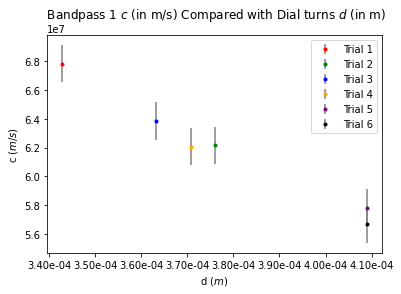

In [ ]:
trials = ["Trial 1", "Trial 2", "Trial 3", "Trial 4", "Trial 5", "Trial 6"] 
my_colors = {0:'red',1:'green',2:'blue', 3:"orange", 4:"purple", 5: "black"} 
for i in range(6):
  plt.errorbar(B1_d_m[i], c_array_bandpass_1[i], yerr = BP1_sigma_c, fmt = ".", ecolor = "gray", color = my_colors[i])  
plt.legend(trials) 
plt.title(r" Bandpass 1 $c$ (in m/s) Compared with Dial turns $d$ (in m)", pad = 17.0, fontweight = "normal")   
plt.ticklabel_format(style = "scientific")   
plt.ylabel(r"c $(m/s)$") 
plt.xlabel(r"d $(m)$")
ax = plt.gca()
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))

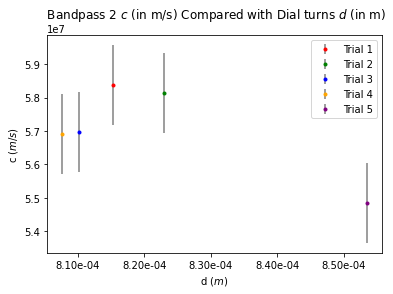

In [ ]:
trials = ["Trial 1", "Trial 2", "Trial 3", "Trial 4", "Trial 5"] 
my_colors = {0:'red',1:'green',2:'blue', 3:"orange", 4:"purple"} 
for i in range(5):
  plt.errorbar(B2_d_m[i], c_array_bandpass_2[i], yerr = BP2_sigma_c, fmt = ".", ecolor = "gray", color = my_colors[i])  
plt.legend(trials) 
plt.title(r" Bandpass 2 $c$ (in m/s) Compared with Dial turns $d$ (in m)", pad = 17.0, fontweight = "normal")   
plt.ticklabel_format(style = "scientific")   
plt.ylabel(r"c $(m/s)$") 
plt.xlabel(r"d $(m)$") 
ax = plt.gca()
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))

##CODE GRAVEYARD: 



```
# This is formatted as code 

def weighted_avg_and_accuracy_calculator(value_array, uncertainty_array) -> tuple: 
  ''' 
    Computes the weighted average using an array of measurements 
    and the associated uncertainties for those measurements 

    Parameters: 
      value_array: numpy.ndarray object with measurements 
      uncertainty: an array of uncertainties associated with the value array 

    returns: 
      a weighted average using the two input arrays
  ''' 

  numerator = np.zeros(len(value_array)) 
  denominator = np.zeros(len(value_array)) 

  for i in range(len(numerator)): 
    numerator[i] = value_array[i]/(uncertainty_array[i]**2) 
    denominator[i] = 1/(uncertainty_array[i]**2)

  numerator_sum = np.sum(numerator) 
  denominator_sum = np.sum(denominator) 

  weighted_avg = numerator_sum / denominator_sum  
  
  accuracy = np.sqrt(1/denominator_sum)
  
  return (weighted_avg, accuracy)

uncertainty_array_for_w = generate_uncertainty_array(standard_dev_of_w_values, 6) 
w_weighted_average, w_accuracy = weighted_avg_and_accuracy_calculator(delta_w_array, uncertainty_array_for_w)  
print(f"the weighted average for measurements of w using the same uncertainty for each measure is {w_weighted_average}")
print(f"The associated accuracy with the delta_w_array is {w_accuracy}")    


def generate_uncertainty_array(input_value: "numpy.ndarray", desired_length: int) -> "numpy.ndarray": 
  '''
    A function that takes a single value and generates 
    an array of values filled with that single value 

    Parameters:  
      input_value: the mean uncertainty value 
      desired_length: desired length of the output array 

    returns: an array of length desired length with measured value at every indx

  '''
  
  new_array = np.zeros(desired_length) 
  for i in range(len(new_array)): 
    new_array[i] = input_value 
  return new_array


'''
```

